<a href="https://colab.research.google.com/github/faisalm93/data-science-30-day-portfolio/blob/main/day02_finance_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

path = "/content/drive/MyDrive/data-science-30-day-portfolio/week1_finance_foundations/day02_finance_eda"
os.makedirs(path, exist_ok=True)
path


'/content/drive/MyDrive/data-science-30-day-portfolio/week1_finance_foundations/day02_finance_eda'

In [5]:
import pandas as pd

import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/loan-default-dataset")

print("Path to dataset files:", path)



Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/loan-default-dataset/versions/1


In [8]:
import pandas as pd
import os

# The 'path' variable is already defined from the previous cell
# path = '/root/.cache/kagglehub/datasets/yasserh/loan-default-dataset/versions/1'

# Assuming the main data file is 'Loan_Default.csv' within the downloaded directory.
# Corrected filename from 'loan_default.csv' to 'Loan_Default.csv' due to FileNotFoundError.
file_name = "Loan_Default.csv"
full_file_path = os.path.join(path, file_name)

df = pd.read_csv(full_file_path)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [9]:
df.shape


(148670, 34)

In [10]:
df.columns


Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [11]:
df.dtypes


,0
ID,int64
year,int64
loan_limit,object
Gender,object
approv_in_adv,object
loan_type,object
loan_purpose,object
Credit_Worthiness,object
open_credit,object
business_or_commercial,object


In [12]:
df.isnull().sum()


,0
ID,0
year,0
loan_limit,3344
Gender,0
approv_in_adv,908
loan_type,0
loan_purpose,134
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


### Imputing Missing Values

I used the following strategies:
- **Numerical columns**: Imputed with the `median` to be robust against outliers.
- **Categorical/Object columns**: Imputed with the `mode` (that is most frequent value).

In [13]:
# Impute numerical columns with their median
numerical_cols_to_impute = [
    'rate_of_interest',
    'Interest_rate_spread',
    'Upfront_charges',
    'term',
    'property_value',
    'income',
    'LTV',
    'dtir1'
]
for col in numerical_cols_to_impute:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median: {median_val}")

# Impute categorical/object columns with their mode
categorical_cols_to_impute = [
    'loan_limit',
    'approv_in_adv',
    'loan_purpose',
    'Neg_ammortization',
    'age',
    'submission_of_application'
]
for col in categorical_cols_to_impute:
    if col in df.columns:
        # Ensure we get a single mode, as there might be multiple if frequencies are tied
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in '{col}' with mode: {mode_val}")

# I pritto verify that missing values have been reduced or removed
print("\nMissing values after imputation:")
print(df.isnull().sum()[df.isnull().sum() > 0])

/tmp/ipython-input-1455453938.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-1455453938.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Imputed missing values in 'rate_of_interest' with median: 3.99
Imputed missing values in 'Interest_rate_spread' with median: 0.3904
Imputed missing values in 'Upfront_charges' with median: 2596.45
Imputed missing values in 'term' with median: 360.0
Imputed missing values in 'property_value' with median: 418000.0
Imputed missing values in 'income' with median: 5760.0
Imputed missing values in 'LTV' with median: 75.13586957
Imputed missing values in 'dtir1' with median: 39.0
Imputed missing values in 'loan_limit' with mode: cf
Imputed missing values in 'approv_in_adv' with mode: nopre
Imputed missing values in 'loan_purpose' with mode: p3
Imputed missing values in 'Neg_ammortization' with mode: not_neg
Imputed missing values in 'age' with mode: 45-54
Imputed missing values in 'submission_of_application' with mode: to_inst

Missing values after imputation:
Series([], dtype: int64)


## Research Questions
After imputig the missig values, here are some questio that will guide the projects:-
1. Which financial factors most influence loan default?
2. How does applicant income relate to loan approval?
3. Does credit history strongly affect default risk?


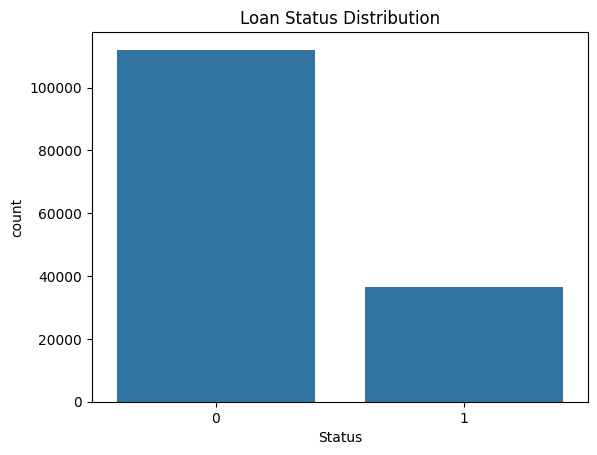

In [15]:
# CONDUCTING A UNIVARIATE ANALYSIS (ONE VARIABLE AT A TIME)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

#Interpretation of Loan Status Distribution Plot
This countplot visualizes the distribution of loan statuses within the  dataset. Typically, in loan default prediction scenarios:

Status 0: Often represents Non-Defaulted loans (loans that were repaid successfully).
Status 1: Often represents Defaulted loans (loans that went into default).

From the plot, I observed that:-


1.   There's a clear imbalance, with a significantly higher number of loans categorized as Status 0 (Non-Defaulted) compared to Status 1 (Defaulted).

2.   Status 0 is the majority class, indicating that the vast majority of loans in this dataset were repaid.
Minority Class: Status 1 is the minority class, meaning loan defaults are a less frequent event in this dataset.



##Why is this important?


1.   Model Bias: A model trained on such imbalanced data might become biased towards the majority class, performing well on non-defaulted loans but poorly on identifying actual defaults.
2.   Evaluation Metrics: Standard evaluation metrics like accuracy can be misleading in imbalanced datasets. Metrics such as precision, recall, F1-score, and ROC-AUC become more critical for evaluating model performance, especially on the minority class.


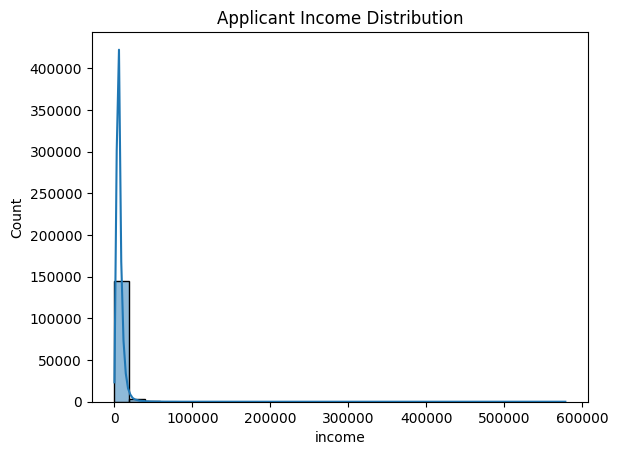

In [17]:
sns.histplot(df['income'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

#Interpretation of Applicant Income Distribution Plot
By examining the shape of the histogram, we can understand the typical income levels and how they vary:


1.  Shape of Distribution: The plot likely shows a right skewed distribution which is known as positively skewed ad this means that a large number of applicants have lower incomes. Therefore, as income increases, the number of applicants decreases ad this shows a long tail extending towards higher income values.
2.   Most Common Income Range: The tallest bars in the histogram represent the income range where most applicants fall indicating that the majority of applicants have relatively modest incomes.


3.   Income Spread: While most applicants might be concentrated in the lower income brackets, the long tail suggests there are also a few applicants with significantly higher incomes, contributing to the overall spread of the data.
4.   Outliers/High Earners: The presence of a long tail to the right also indicates the existence of some applicants who earn considerably more than the average, appearing as potential outliers on the higher end.

##Implications for Analysis:

Financial Inclusion: A right-skewed income distribution often reflects real-world economic conditions where wealth is not evenly distributed.

Modeling Considerations: When building models, skewed distributions might sometimes require transformation (e.g., log transformation) to normalize the data, which can improve model performance, especially for linear models.

Risk Assessment: Understanding the income distribution is crucial for assessing loan risk. Lower income applicants might pose different risks than higher income applicants, and this distribution helps frame those considerations.





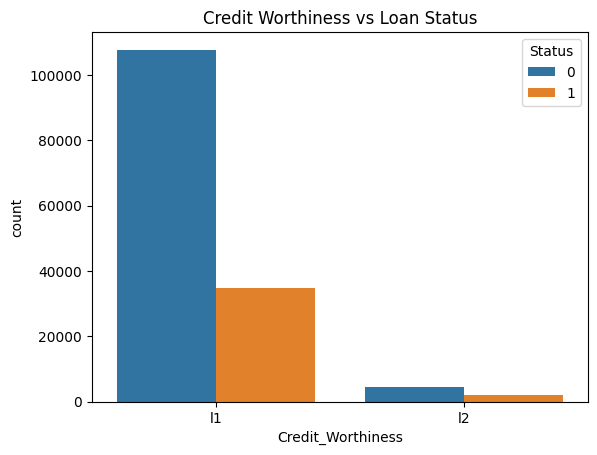

In [19]:
sns.countplot(x='Credit_Worthiness', hue='Status', data=df)
plt.title("Credit Worthiness vs Loan Status")
plt.show()

#Interpretation of Credit Worthiness vs Loan Status Plot

By looking at this plot (0 for non-defaulted, 1 for defaulted), we can assess whether different levels of credit worthiness have varying propensities for loan default.

From the plot, you can generally observe:


1.  Distribution within Categories: For each Credit_Worthiness category (e.g., 'l1', 'l2'), the plot shows the count of loans that resulted in Status 0 (non-defaulted) and Status 1 (defaulted).
2.   Impact of Credit Worthiness: You can visually compare the proportion of Status 1 (defaulted loans) relative to Status 0 (non-defaulted loans) across the different Credit_Worthiness categories.

Higher Default Rates: If one Credit_Worthiness category shows a significantly taller bar for Status 1 compared to its Status 0 bar (or a higher proportion of Status 1 compared to other categories), it suggests that applicants in that category might have a higher risk of default.

Lower Default Rates: Conversely, categories with a very small or non-existent Status 1 bar relative to their Status 0 bar might indicate lower default risk.




### Correlation between Credit_Worthiness and Status (Contingency Table)

Since `Credit_Worthiness` and `Status` are both categorical variables, we can examine their relationship using a contingency table (also known as a crosstabulation). This table will show the counts of observations for each combination of categories.

In [20]:
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(df['Credit_Worthiness'], df['Status'])
display(contingency_table)

# Optionally, to see percentages within each Credit_Worthiness category
print("\nPercentage distribution of Status within each Credit_Worthiness category:")
contingency_table_percent = pd.crosstab(df['Credit_Worthiness'], df['Status'], normalize='index') * 100
display(contingency_table_percent)

Status,0,1
Credit_Worthiness,,
l1,107715,34629
l2,4316,2010



Percentage distribution of Status within each Credit_Worthiness category:


Status,0,1
Credit_Worthiness,,
l1,75.672315,24.327685
l2,68.226367,31.773633


#### Interpretation of the Contingency Table:

*   **Raw Counts:** The first table shows the actual number of loans for each combination of `Credit_Worthiness` and `Status`.
*   **Percentage Distribution:** The second table is more insightful for assessing association. It shows, for each `Credit_Worthiness` category, the percentage of loans that resulted in `Status 0` and `Status 1`. If the percentage of `Status 1` varies significantly across different `Credit_Worthiness` categories, it suggests a strong association (or 'correlation' in a broader sense) between the two variables.

For example, if one `Credit_Worthiness` category has a much higher percentage of `Status 1` compared to others, it indicates that particular credit worthiness level is associated with a higher default risk.

## My Key Takeaway
1. Applicants with a positive credit history are significantly more likely to have loans approved.
2. Income alone does not fully determine loan approval.
3. Some approved loans exist even at lower income levels, indicating multi-factor decisions.
